# Titanic Exploratory Analysis

# Some hypotheses:
1. Women are more likely to survive then men.
2. Children are more likely to survive than adults. Elderly are less likely to survive than children.
3. Upper class passengers are more likely to survive than lower class passengers.
4. Passengers whom paid more in fare are likely from an upper class and are more likely to survive. 
5. Perhaps there is port that relates to economic status and passengers from that port are more likely to survive.
6. Passengers with a cabin are more likely to survive (higher class). 
7. Passengers with family are more likely to survive. 

# Import
Import the dataset and observe some basic information

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
training_data = pd.read_csv("train.csv", index_col="PassengerId")

Columns of the dataset

In [134]:
training_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Preview the top of the dataset

In [135]:
training_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [136]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


There is missing data from Age, Cabin and Embarked. It may be possible that a person did not have a Cabin.

# Examine Survival Rate by Categories

Preliminary examination before cleaning up the data. These columns are completed.

In [137]:
print ("The survival rate on the Titanic was {:3.2f}%".format(training_data.Survived.sum()/training_data.Survived.count()*100))

The survival rate on the Titanic was 38.38%


Function returns the survival rate for all unique values in category 'cat'

In [138]:
def survival_by_category (df, cat):
    return np.round(df[df["Survived"]==1][cat].value_counts()/df[cat].value_counts()*100)

(1) 
Females were more likely to survive than males

In [139]:
survival_by_category(training_data, 'Sex')

female    74.0
male      19.0
Name: Sex, dtype: float64

(3) Upper class passengers were more likely to survive than lower class passengers

In [140]:
survival_by_category(training_data, 'Pclass')

1    63.0
2    47.0
3    24.0
Name: Pclass, dtype: float64

(5) Passengers thats boarded from port C were more likely to survive than those whom boarded from other ports

In [141]:
survival_by_category(training_data, 'Embarked')

S    34.0
C    55.0
Q    39.0
Name: Embarked, dtype: float64

The majority of passengers boarded port S

In [142]:
training_data.Embarked.value_counts()/training_data.Embarked.count()*100

S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64

The majority of passsengers that board from Port S were of lower class status.
The majority of passengers that board from Port C were of higher class status.
The majority of passengers that boarded from Port Q were of lower class status. 

In [143]:
training_data.groupby(["Embarked","Pclass"])["Survived"].count()

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: Survived, dtype: int64

## Clean the Data

Convert sex to numeric. Check the unique values.

In [144]:
training_data.Sex.unique()

array(['male', 'female'], dtype=object)

Convert sex to 1 if male 0 if female.

In [145]:
training_data.Sex = training_data.Sex.map(lambda x: 1 if x == "male" else 0 )

Confirm change was made.

In [146]:
training_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


Convert the port to numeric. First, I was going to fill in empty ports as "S" which was most frequnt. However, the passengers are Pclass=1 and survived. Passengers from port "C" survived most often. I could perhaps use another variable to help predict, but there are only 2 so it is low reward.

In [147]:
training_data[~training_data.Embarked.isin(["S", "Q", "C"])]["Embarked"]

PassengerId
62     NaN
830    NaN
Name: Embarked, dtype: object

In [148]:
training_data.Embarked.fillna("C",inplace=True)

Confrim the change has been made

In [149]:
training_data[~training_data["Embarked"].isin(["S","Q","C"])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


Convert Embarked to numberic. The correct apporoach may be to separate into separate columns since the categories are nominal. 

In [150]:
training_data.Embarked = pd.factorize(training_data.Embarked)[0]

In [151]:
training_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0


Bin the Fare. This may help predict the missing values for the age column. I suspect younger passengers pay less in general
but may be correlated with PClass.

In [152]:
training_data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

## Fare Price for Different PClass 

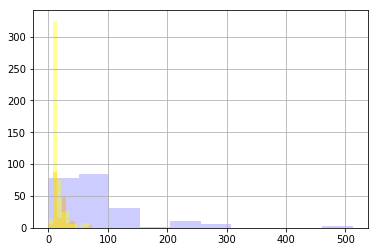

In [153]:
training_data[training_data["Pclass"] == 1]["Fare"].hist(color="blue", alpha=0.2)
training_data[training_data["Pclass"] == 2]["Fare"].hist(color="orange", alpha=0.4)
training_data[training_data["Pclass"] == 3]["Fare"].hist(color="yellow", alpha=0.4)

(4) The fare prices differ according to the passenger class. High class passngers tend to pay much more than lower class. The 75% fare is \$31 but many first class passengers pay more than \$100 (up to \$512). Women also tend to pay more than men (\$44 vs \$26 on average).

In [154]:
print(training_data["Fare"].describe())

print(f"\n\nThe mean fair for men is ${round(training_data[training_data['Sex'] == 1]['Fare'].mean())}")
print(f"The mean fair for women is ${round(training_data[training_data['Sex'] == 0]['Fare'].mean())}")

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


The mean fair for men is $26
The mean fair for women is $44


## Fare Price by Age for Different PClass

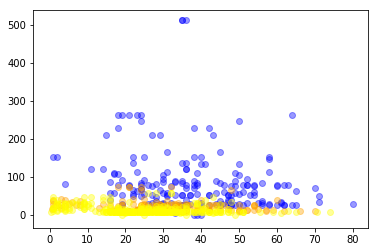

In [155]:
plt.scatter(training_data[training_data["Pclass"]==1].Age, training_data[training_data["Pclass"]==1].Fare, color="blue", alpha=0.4)
plt.scatter(training_data[training_data["Pclass"]==2].Age, training_data[training_data["Pclass"]==2].Fare, color="orange", alpha=0.4)
plt.scatter(training_data[training_data["Pclass"]==3].Age, training_data[training_data["Pclass"]==3].Fare, color="yellow", alpha=0.4)

There doesn't seem to be a correlation between age and fare. The correlation between class and fare is more prodominent. 

I want to group the fare price so I can inference the class. Anyone that paid under \$21 is likely from Pclass 3. Anyone over \$75 is from PClass 3.

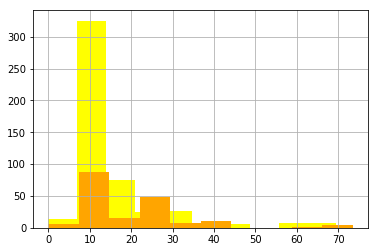

In [156]:
training_data[training_data["Pclass"] == 3]["Fare"].hist(color="yellow")
training_data[training_data["Pclass"] == 2]["Fare"].hist(color="orange")

In [157]:
training_data.Fare = pd.cut(training_data.Fare, bins=[0, 21, 75, 1000], labels=["1","2","3"])

In [158]:
training_data.Fare.head()

PassengerId
1    1
2    2
3    1
4    2
5    1
Name: Fare, dtype: category
Categories (3, object): [1 < 2 < 3]

Bin the age. There are many missing values so let's try to predict the age first.

In [159]:
training_data.groupby('Pclass')['Age'].aggregate(["min", "mean", "max"])

,min,mean,max
Pclass,,,
1,0.92,38.233441,80.0
2,0.67,29.877630,70.0
3,0.42,25.140620,74.0


Each Pclass has passengers from all age groups, but the average age is higher for upper class and lower for lower class.

Create a group to predict the missing ages using the mean of the group.

In [160]:
age_groups = training_data.groupby(['Pclass', "Sex", "Survived", "Embarked"])['Age']

In [161]:
training_data[training_data.Age.isnull()].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,1,NaN,2
18,1,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,1,NaN,0
20,1,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,2649,1,NaN,1
27,0,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,1,NaN,1
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,330959,1,NaN,2


Function finds the average age of the group

In [162]:
def estimate_age(df):
    return age_groups.get_group((df.Pclass,df.Sex,df.Survived,df.Embarked)).mean()

Apply the function to estimate the missing age. First check the Age column information. Maybe the missing values are interpretted as strings, so .describe() does not give the mean.

In [163]:
training_data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [164]:
for index, data in training_data.iterrows():
    if(str(data.Age) == "nan"):
        training_data.loc[index, "Age"] = estimate_age(data)

Check that the missing values were populated. 

In [165]:
training_data.Age.describe()

count    891.000000
mean      29.293289
std       13.464235
min        0.420000
25%       21.000000
50%       27.555556
75%       36.000000
max       80.000000
Name: Age, dtype: float64

Now group the ages. I want the survival rate of each group to be similar to the original data.

Visually, it appears that the qcut(20) would suffice 

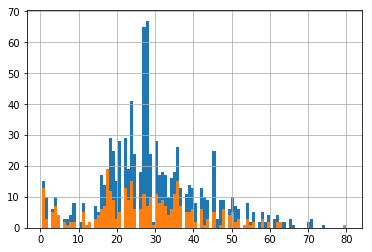

In [166]:
training_data.Age.hist(bins=100)
training_data[training_data["Survived"] == 1].Age.hist(bins=100)

In [167]:
training_data.Age = pd.cut(training_data.Age,20, labels = [str(i) for i in range(20)])

Check that the age was binned correctly.

In [168]:
training_data.Age.describe()

count     891
unique     20
top         6
freq      174
Name: Age, dtype: object

In [169]:
training_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,5,1,0,A/5 21171,1,NaN,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,9,1,0,PC 17599,2,C85,1
3,1,3,"Heikkinen, Miss. Laina",0,6,0,0,STON/O2. 3101282,1,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,8,1,0,113803,2,C123,0
5,0,3,"Allen, Mr. William Henry",1,8,0,0,373450,1,NaN,0


I am going to combine SibSp and Parch into a new feature "hasfamily". I suspect that passengers with any family were more likely to survive.

In [170]:
training_data["HasFamily"] = training_data.apply(lambda row: 1 if (row["SibSp"] + row["Parch"]) > 0 else 0, axis=1)

Confirm the new column was added.

In [171]:
training_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasFamily
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,5,1,0,A/5 21171,1,NaN,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,9,1,0,PC 17599,2,C85,1,1
3,1,3,"Heikkinen, Miss. Laina",0,6,0,0,STON/O2. 3101282,1,NaN,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,8,1,0,113803,2,C123,0,1
5,0,3,"Allen, Mr. William Henry",1,8,0,0,373450,1,NaN,0,0


Drop SibSp and Parch

In [172]:
training_data = training_data.drop(["SibSp", "Parch"], axis=1)

In [173]:
training_data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,HasFamily
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,5,A/5 21171,1,NaN,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,9,PC 17599,2,C85,1,1
3,1,3,"Heikkinen, Miss. Laina",0,6,STON/O2. 3101282,1,NaN,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,8,113803,2,C123,0,1
5,0,3,"Allen, Mr. William Henry",1,8,373450,1,NaN,0,0


Binning the tickets looks challenging. There may be some information not captured in the fare but ill drop it. 

In [174]:
len(training_data.Ticket.unique())

681

In [175]:
training_data = training_data.drop("Ticket", axis=1)

In [176]:
training_data.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,HasFamily
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,5,1,NaN,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,9,2,C85,1,1
3,1,3,"Heikkinen, Miss. Laina",0,6,1,NaN,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,8,2,C123,0,1
5,0,3,"Allen, Mr. William Henry",1,8,1,NaN,0,0


The cabin information may be related to the Pclass/Fare price. I think the location of the cabin would have little impact on survival rates - passengers proboably had time to get to the boats and were then prioritized. Families may require larger cabins but this is captured in "HasFamily" and perhaps PClass.

In [177]:
training_data.Cabin.describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

I could have used more sophisticated logic, or did some grouping like how I predicted the age but I think Has Family and PClass could be used over HasCabin.

In [182]:
training_data.Cabin = training_data.Cabin.fillna(0);

In [183]:
training_data["HasCabin"] = training_data.apply(lambda row: 1 if row["Cabin"] != 0 else 0, axis=1)

In [184]:
training_data.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,HasFamily,HasCabin
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,5,1,0,0,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,9,2,C85,1,1,1
3,1,3,"Heikkinen, Miss. Laina",0,6,1,0,0,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,8,2,C123,0,1,1
5,0,3,"Allen, Mr. William Henry",1,8,1,0,0,0,0


Check how many passengers with family have cabins. The mean is much higher (3x) when pssengers have family but there is a large std.

In [185]:
training_data[training_data["HasFamily"] == 1]["HasCabin"].describe()

count    354.000000
mean       0.310734
std        0.463449
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: HasCabin, dtype: float64

In [186]:
training_data[training_data["HasFamily"] == 0]["HasCabin"].describe()

count    537.000000
mean       0.175047
std        0.380361
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: HasCabin, dtype: float64

In [188]:
training_data.groupby('Pclass')["HasCabin"].mean()

Pclass
1    0.814815
2    0.086957
3    0.024440
Name: HasCabin, dtype: float64

As expected, first class passengers were more likely to have a cabin. I am going to drop both Cabin and HasCabin. There was a lot of mising data from Cabin and I think the other columns will be sufficient. One last check on survival rates shows passengers with cabins were more likely to survive. 

In [189]:
survival_by_category(training_data, "HasCabin")

0    30.0
1    67.0
Name: HasCabin, dtype: float64

In [190]:
training_data = training_data.drop("Cabin", axis=1);

I suspect the Name column may have some information about employees on the ship which could help predict whether they survived. Some research is required to learn more about the meaning of the titles. For this analysis, I will drop the column and use the Sex column.

In [191]:
training_data = training_data.drop("Name", axis=1);

In [192]:
training_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,HasFamily,HasCabin
PassengerId,,,,,,,,
1,0,3,1,5,1,0,1,0
2,1,1,0,9,2,1,1,1
3,1,3,0,6,1,0,0,0
4,1,1,0,8,2,0,1,1
5,0,3,1,8,1,0,0,0


In [193]:
survival_by_category(training_data, "Pclass")

1    63.0
2    47.0
3    24.0
Name: Pclass, dtype: float64

(3) Passengers that were upper class status were more likely to survive.

In [194]:
survival_by_category(training_data, "Sex")

0    74.0
1    19.0
Name: Sex, dtype: float64

(1) Female passengers were more likely to survive. 

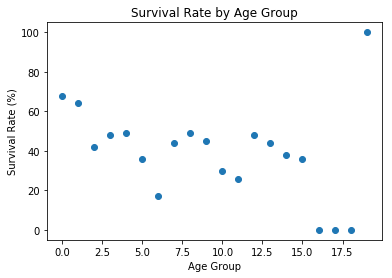

In [195]:
plt.scatter(survival_by_category(training_data, "Age").index,survival_by_category(training_data, "Age").values)
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate (%)")

(2) The age groups are in invervals of about 5 years. The results show that children were more likely to survive. Elderly were the least likely to survive except for the oldest passenger who did survive!

In [207]:
training_data[training_data.Age > '17']

,Survived,Pclass,Sex,Age,Fare,Embarked,HasFamily,HasCabin
PassengerId,,,,,,,,
631,1,1,1,19,2,0,0,1
852,0,3,1,18,1,0,0,0


In [196]:
survival_by_category(training_data, "Fare")

1    29.0
2    45.0
3    76.0
Name: Fare, dtype: float64

(4) Passengers who paid more for their ticket were more likely to survive (correlated with sex and pclass). 

In [197]:
survival_by_category(training_data, "Embarked")

0    34.0
1    56.0
2    39.0
Name: Embarked, dtype: float64

(5) Passengers boarding from C, were more likely to survive than S and  Q (about equal).

In [198]:
survival_by_category(training_data, "HasFamily")

0    30.0
1    51.0
Name: HasFamily, dtype: float64

(7) Passengers with family were more likely to survive. 

In [199]:
survival_by_category(training_data, "HasCabin")

0    30.0
1    67.0
Name: HasCabin, dtype: float64

(6) Passengers with a cabin were more likely to survive.